In [1]:
# import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None,na_values=['?',' ?'])

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None,na_values=['?',' ?'])


col_labels = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
# let's mearge train & test data set
df = pd.concat([train_set,test_set],axis=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64


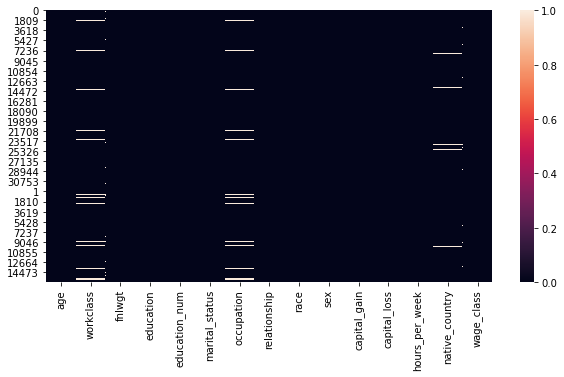

In [5]:
# checking the null values
print(df.isnull().sum())
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [6]:
# impute the missing values
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native_country'] = df['native_country'].fillna(df['native_country'].mode()[0])

In [7]:
# again checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

## FEATURE ENGINEERING

check the unique values

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [10]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [11]:
df['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [12]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [13]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [15]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [16]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [17]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
df['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [19]:
df['wage_class'] = df['wage_class'].replace(' <=50K.',' <=50K')
df['wage_class'] = df['wage_class'].replace(' >50K.',' >50K')

In [20]:
df['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
# ENCODING the categorical values
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [22]:
df1 = pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep='_',drop_first=True)
df2 = pd.get_dummies(df['marital_status'],prefix='marital',prefix_sep='_',drop_first=True)
df3 = pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep='_',drop_first=True)
df4 = pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep='_',drop_first=True)
df5 = pd.get_dummies(df['race'],prefix='race',prefix_sep='_',drop_first=True)
df6 = pd.get_dummies(df['sex'],prefix='sex',prefix_sep='_',drop_first=True)
df7 = pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep='_',drop_first=True)
df8 = pd.get_dummies(df['wage_class'],prefix='wage_class',prefix_sep='_',drop_first=True)

In [23]:
df = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 92 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   age                                         48842 non-null  int64 
 1   workclass                                   48842 non-null  object
 2   fnlwgt                                      48842 non-null  int64 
 3   education                                   48842 non-null  object
 4   education_num                               48842 non-null  int64 
 5   marital_status                              48842 non-null  object
 6   occupation                                  48842 non-null  object
 7   relationship                                48842 non-null  object
 8   race                                        48842 non-null  object
 9   sex                                         48842 non-null  object
 10  capital_gain          

In [25]:
# drop unnecessory columns
df.drop(['workclass','education','marital_status','occupation','relationship','race','sex','native_country','wage_class'],axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         48842 non-null  int64
 1   fnlwgt                                      48842 non-null  int64
 2   education_num                               48842 non-null  int64
 3   capital_gain                                48842 non-null  int64
 4   capital_loss                                48842 non-null  int64
 5   hours_per_week                              48842 non-null  int64
 6   workclass_ Local-gov                        48842 non-null  uint8
 7   workclass_ Never-worked                     48842 non-null  uint8
 8   workclass_ Private                          48842 non-null  uint8
 9   workclass_ Self-emp-inc                     48842 non-null  uint8
 10  workclass_ Self-emp-not-inc       

In [27]:
# change the data type
for i in df.columns:
    df[i] = df[i].astype('int64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         48842 non-null  int64
 1   fnlwgt                                      48842 non-null  int64
 2   education_num                               48842 non-null  int64
 3   capital_gain                                48842 non-null  int64
 4   capital_loss                                48842 non-null  int64
 5   hours_per_week                              48842 non-null  int64
 6   workclass_ Local-gov                        48842 non-null  int64
 7   workclass_ Never-worked                     48842 non-null  int64
 8   workclass_ Private                          48842 non-null  int64
 9   workclass_ Self-emp-inc                     48842 non-null  int64
 10  workclass_ Self-emp-not-inc       

In [29]:
x = df.drop(['wage_class_ >50K'],axis=1)
y = df['wage_class_ >50K']

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16277,64,321403,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16278,38,374983,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16279,44,83891,13,5455,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,auc,classification_report,plot_precision_recall_curve,precision_score,roc_auc_score,roc_curve,confusion_matrix,f1_score,plot_confusion_matrix,plot_roc_curve,recall_score,precision_score
from xgboost import XGBClassifier

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,random_state=23)

In [33]:
print('xtrain shape',xtrain.shape)
print('xtest shape',xtest.shape)
print('ytrain shape',ytrain.shape)
print('ytest shape',ytest.shape)

xtrain shape (36631, 82)
xtest shape (12211, 82)
ytrain shape (36631,)
ytest shape (12211,)


In [34]:
clf = XGBClassifier()
clf.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)
ytrain_proba = clf.predict_proba(xtrain)[:,1]
ytest_proba = clf.predict_proba(xtest)[:,1]

In [36]:
print('accuracy score = ' , accuracy_score(ytest,ytest_pred))
print('\n recall score = ',recall_score(ytest,ytest_pred))
print('\n precision score = ',precision_score(ytest,ytest_pred))

accuracy score =  0.8722463352714765

 recall score =  0.6615384615384615

 precision score =  0.7830562153602534


In [37]:
confusion_matrix(ytest,ytest_pred)

array([[8673,  548],
       [1012, 1978]], dtype=int64)

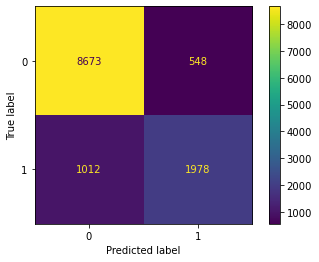

In [38]:
plot_confusion_matrix(clf,xtest,ytest)

In [39]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      9221
           1       0.78      0.66      0.72      2990

    accuracy                           0.87     12211
   macro avg       0.84      0.80      0.82     12211
weighted avg       0.87      0.87      0.87     12211



Text(0.5, 1.0, 'ROC CURVE AREA 0.93')

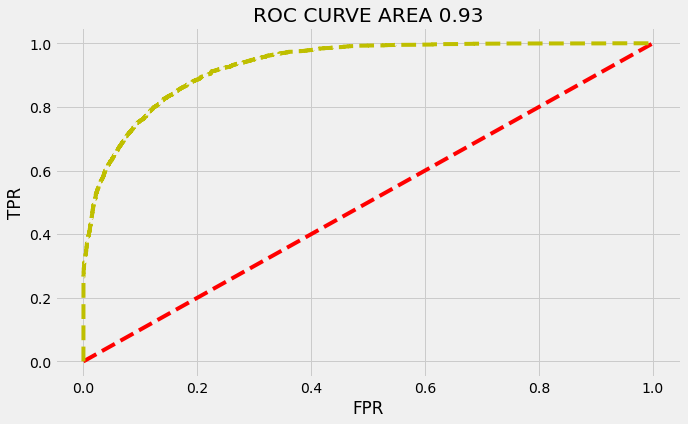

In [40]:
fpr,tpr,threshold = roc_curve(ytest,ytest_proba)
auc = roc_auc_score(ytest,ytest_proba)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,'y--',label='ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE AREA {:.2f}'.format(auc))

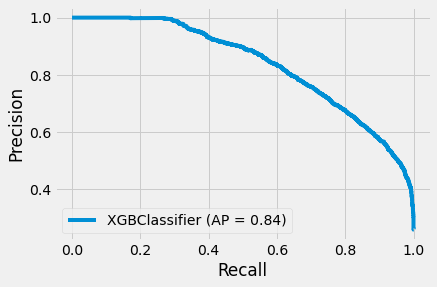

In [41]:
plot_precision_recall_curve(clf,xtest,ytest)

In [42]:
import pickle
pickle.dump(clf,open('xgboost_assignment.sav','wb'))
pickle.dump(scaler,open('standard_scaler.sav','wb'))